In [1]:
import pandas as pd
import seaborn as sns

In [2]:
predictions = pd.read_parquet('/n/scratch/users/w/wg41/2024-06-10_ont_bio_age_optimization_predictions.parquet')

In [3]:
tmp_out = []
for (age_sd, n_splines), p in predictions.groupby(['age_sd', 'n_splines']):
    for r, _df in p.groupby('repeat'):
        monotonicity = ((_df.groupby('chron')['bio'].std().rolling(3, center=True, min_periods=1).mean().diff(2) / 2) > 0).mean()
        median_bio_mae = _df.groupby('chron')['bio'].median().reset_index().diff(axis=1).drop(columns=['chron']).abs().mean()['bio']
        tmp_out.append(dict(mono=monotonicity, mae=median_bio_mae, repeat=r, age_sd=age_sd, n_splines=n_splines))
tmp_out_df = pd.DataFrame(tmp_out)

<Axes: xlabel='age_sd', ylabel='n_splines'>

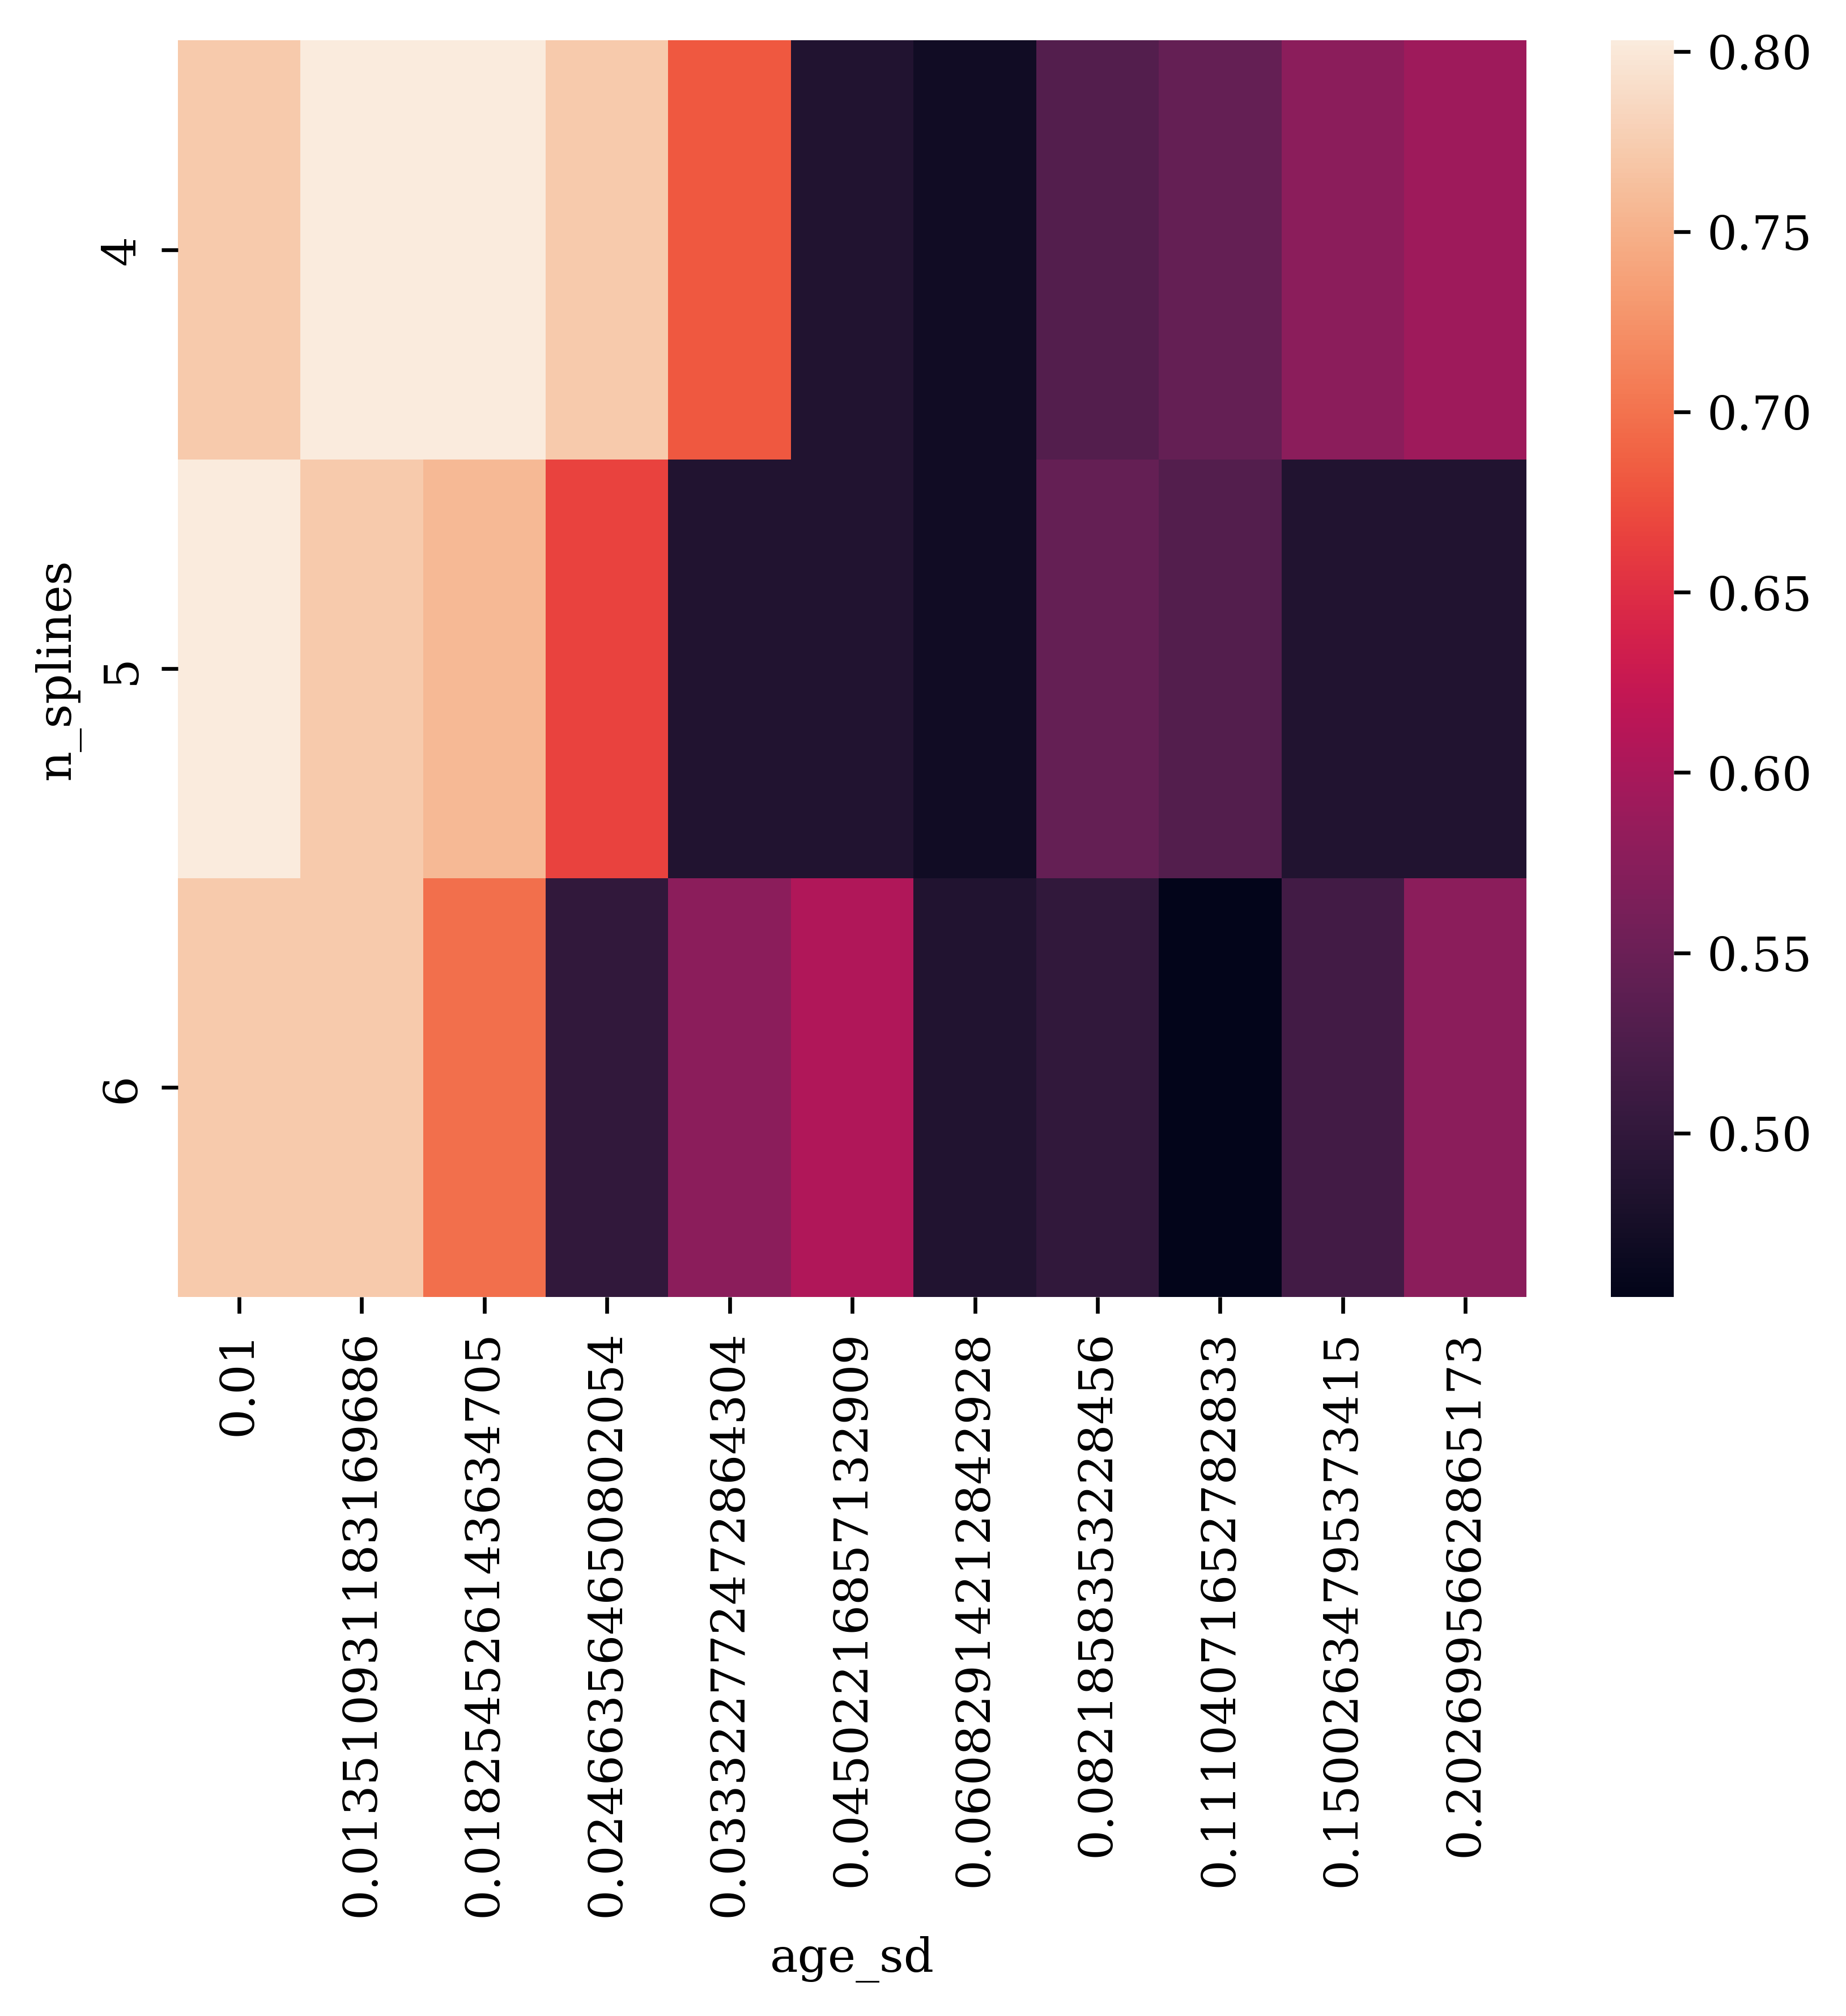

In [4]:
sns.heatmap(tmp_out_df.pivot_table(columns='age_sd', index='n_splines', values='mono'))

[None]

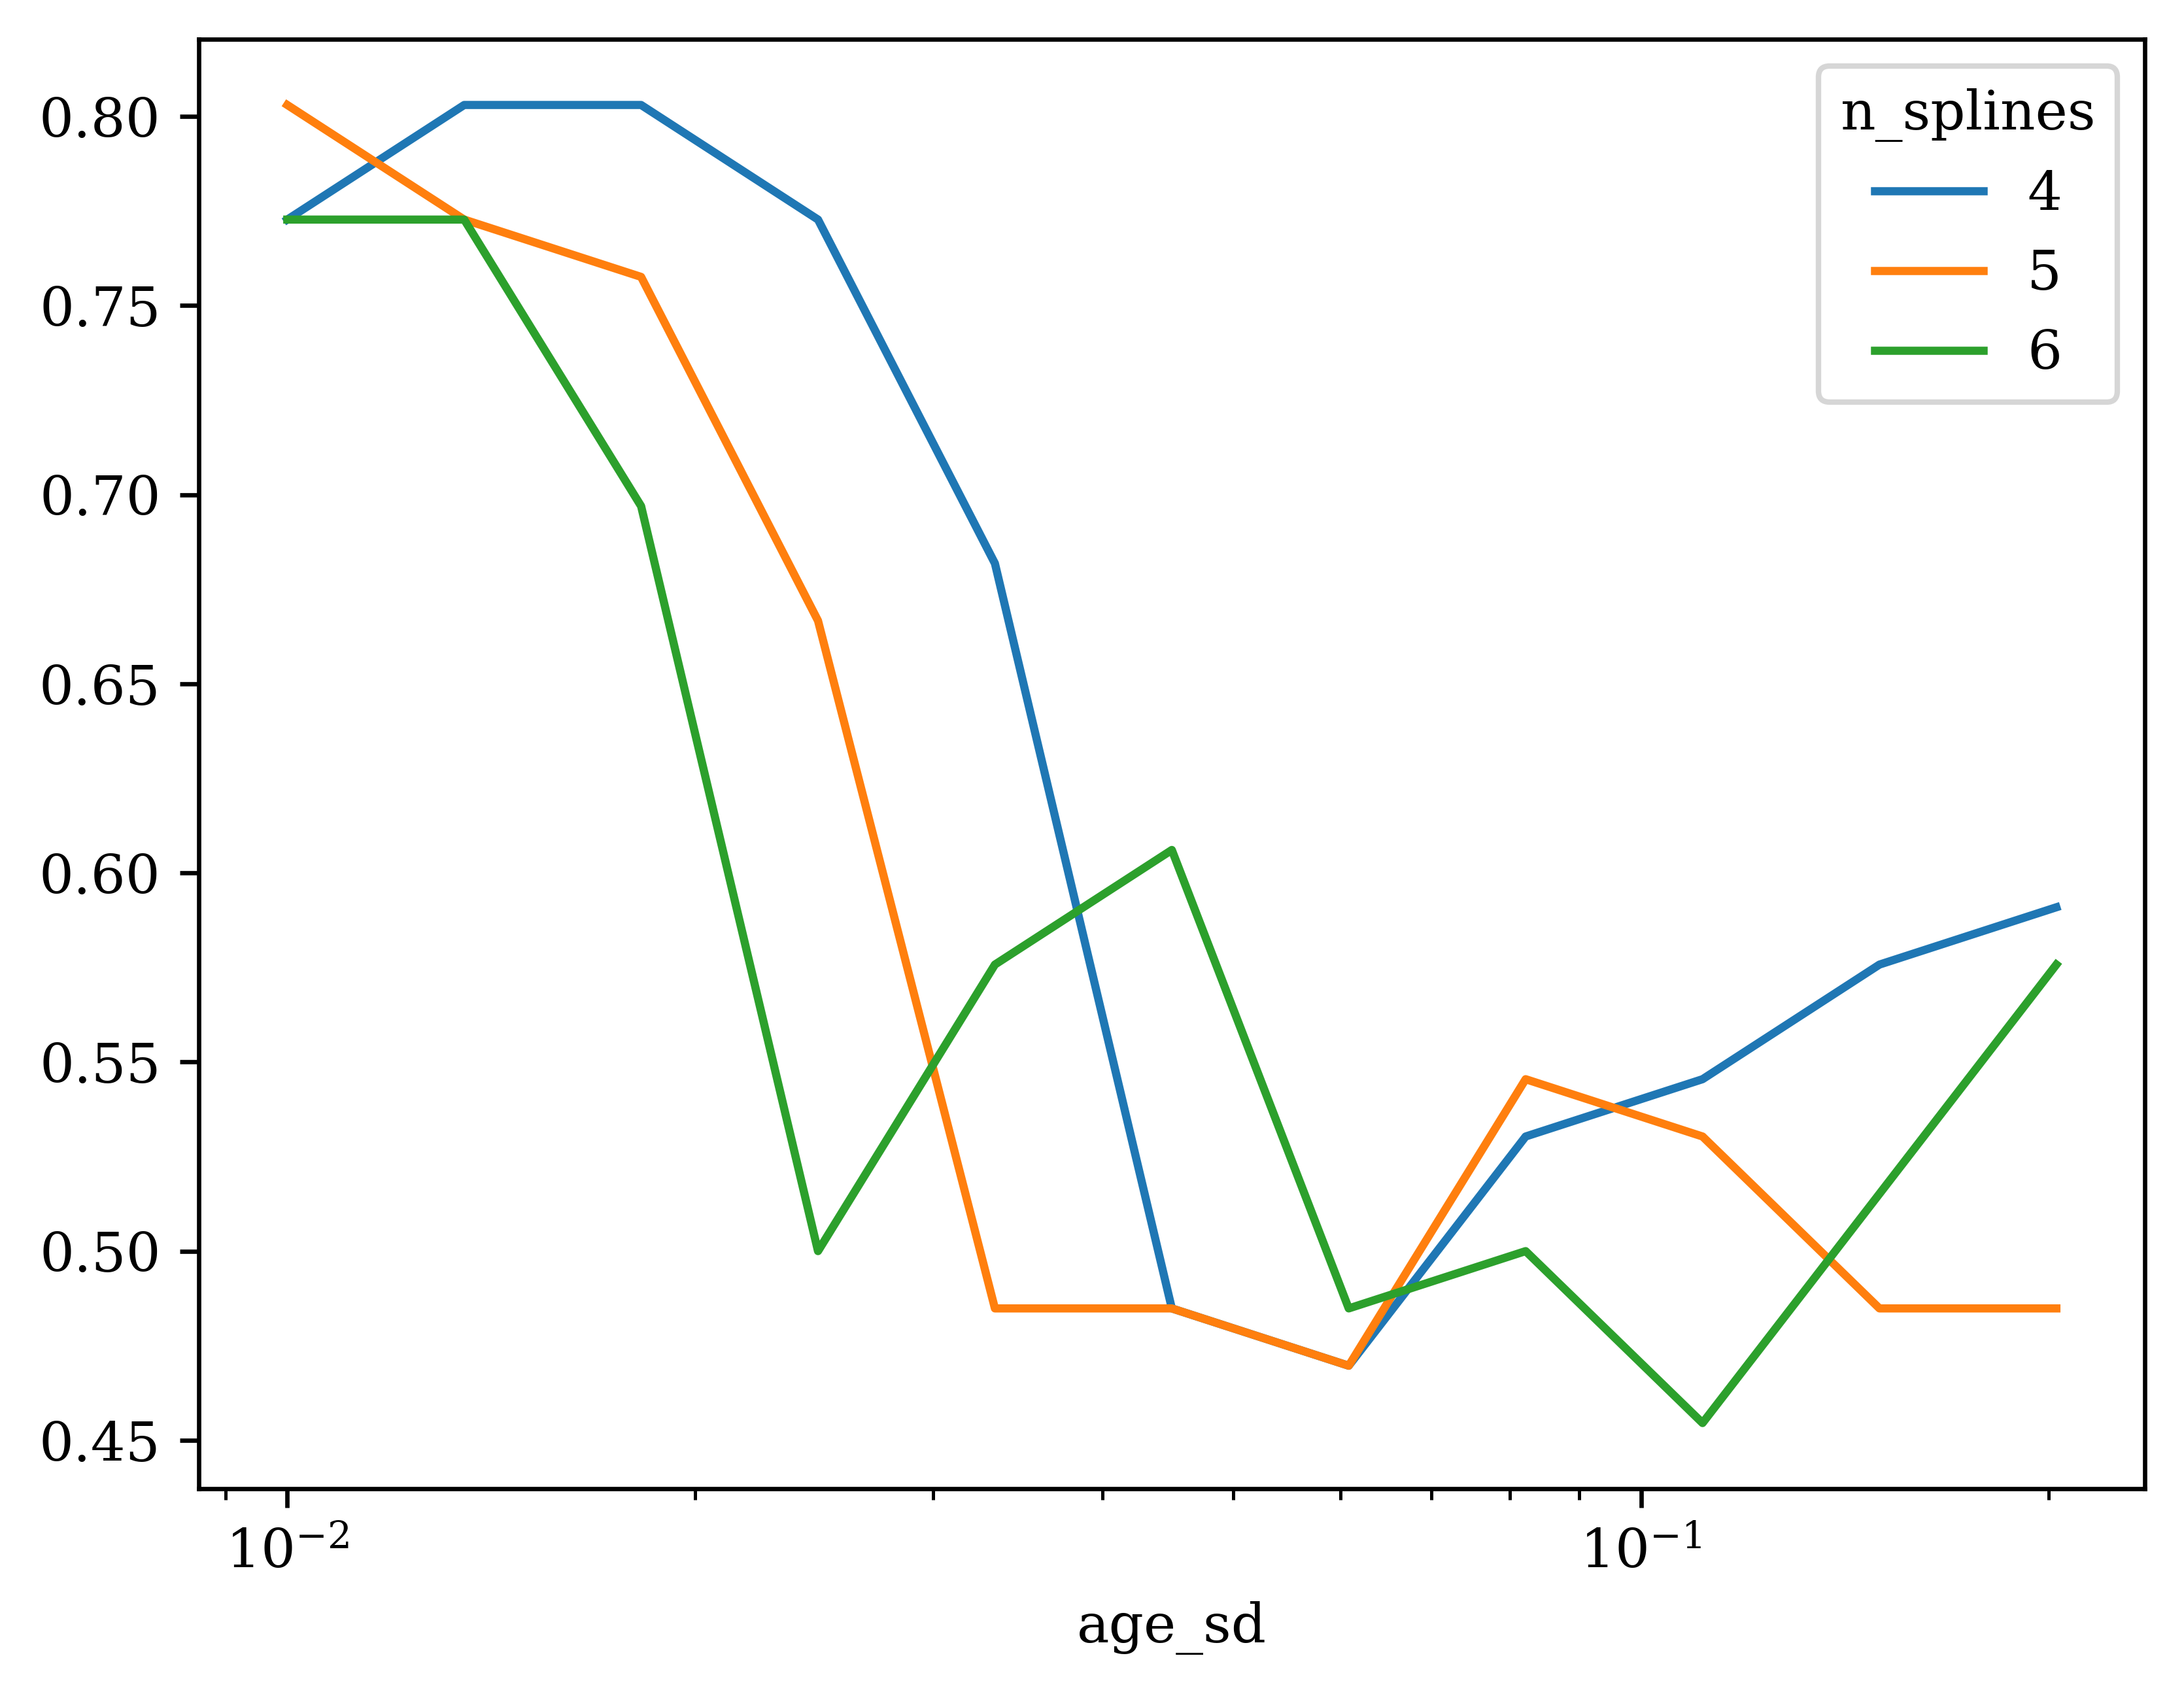

In [5]:
ax = tmp_out_df.pivot_table(index='age_sd', columns='n_splines', values='mono').plot()
ax.set(xscale='log')

<Axes: xlabel='age_sd', ylabel='n_splines'>

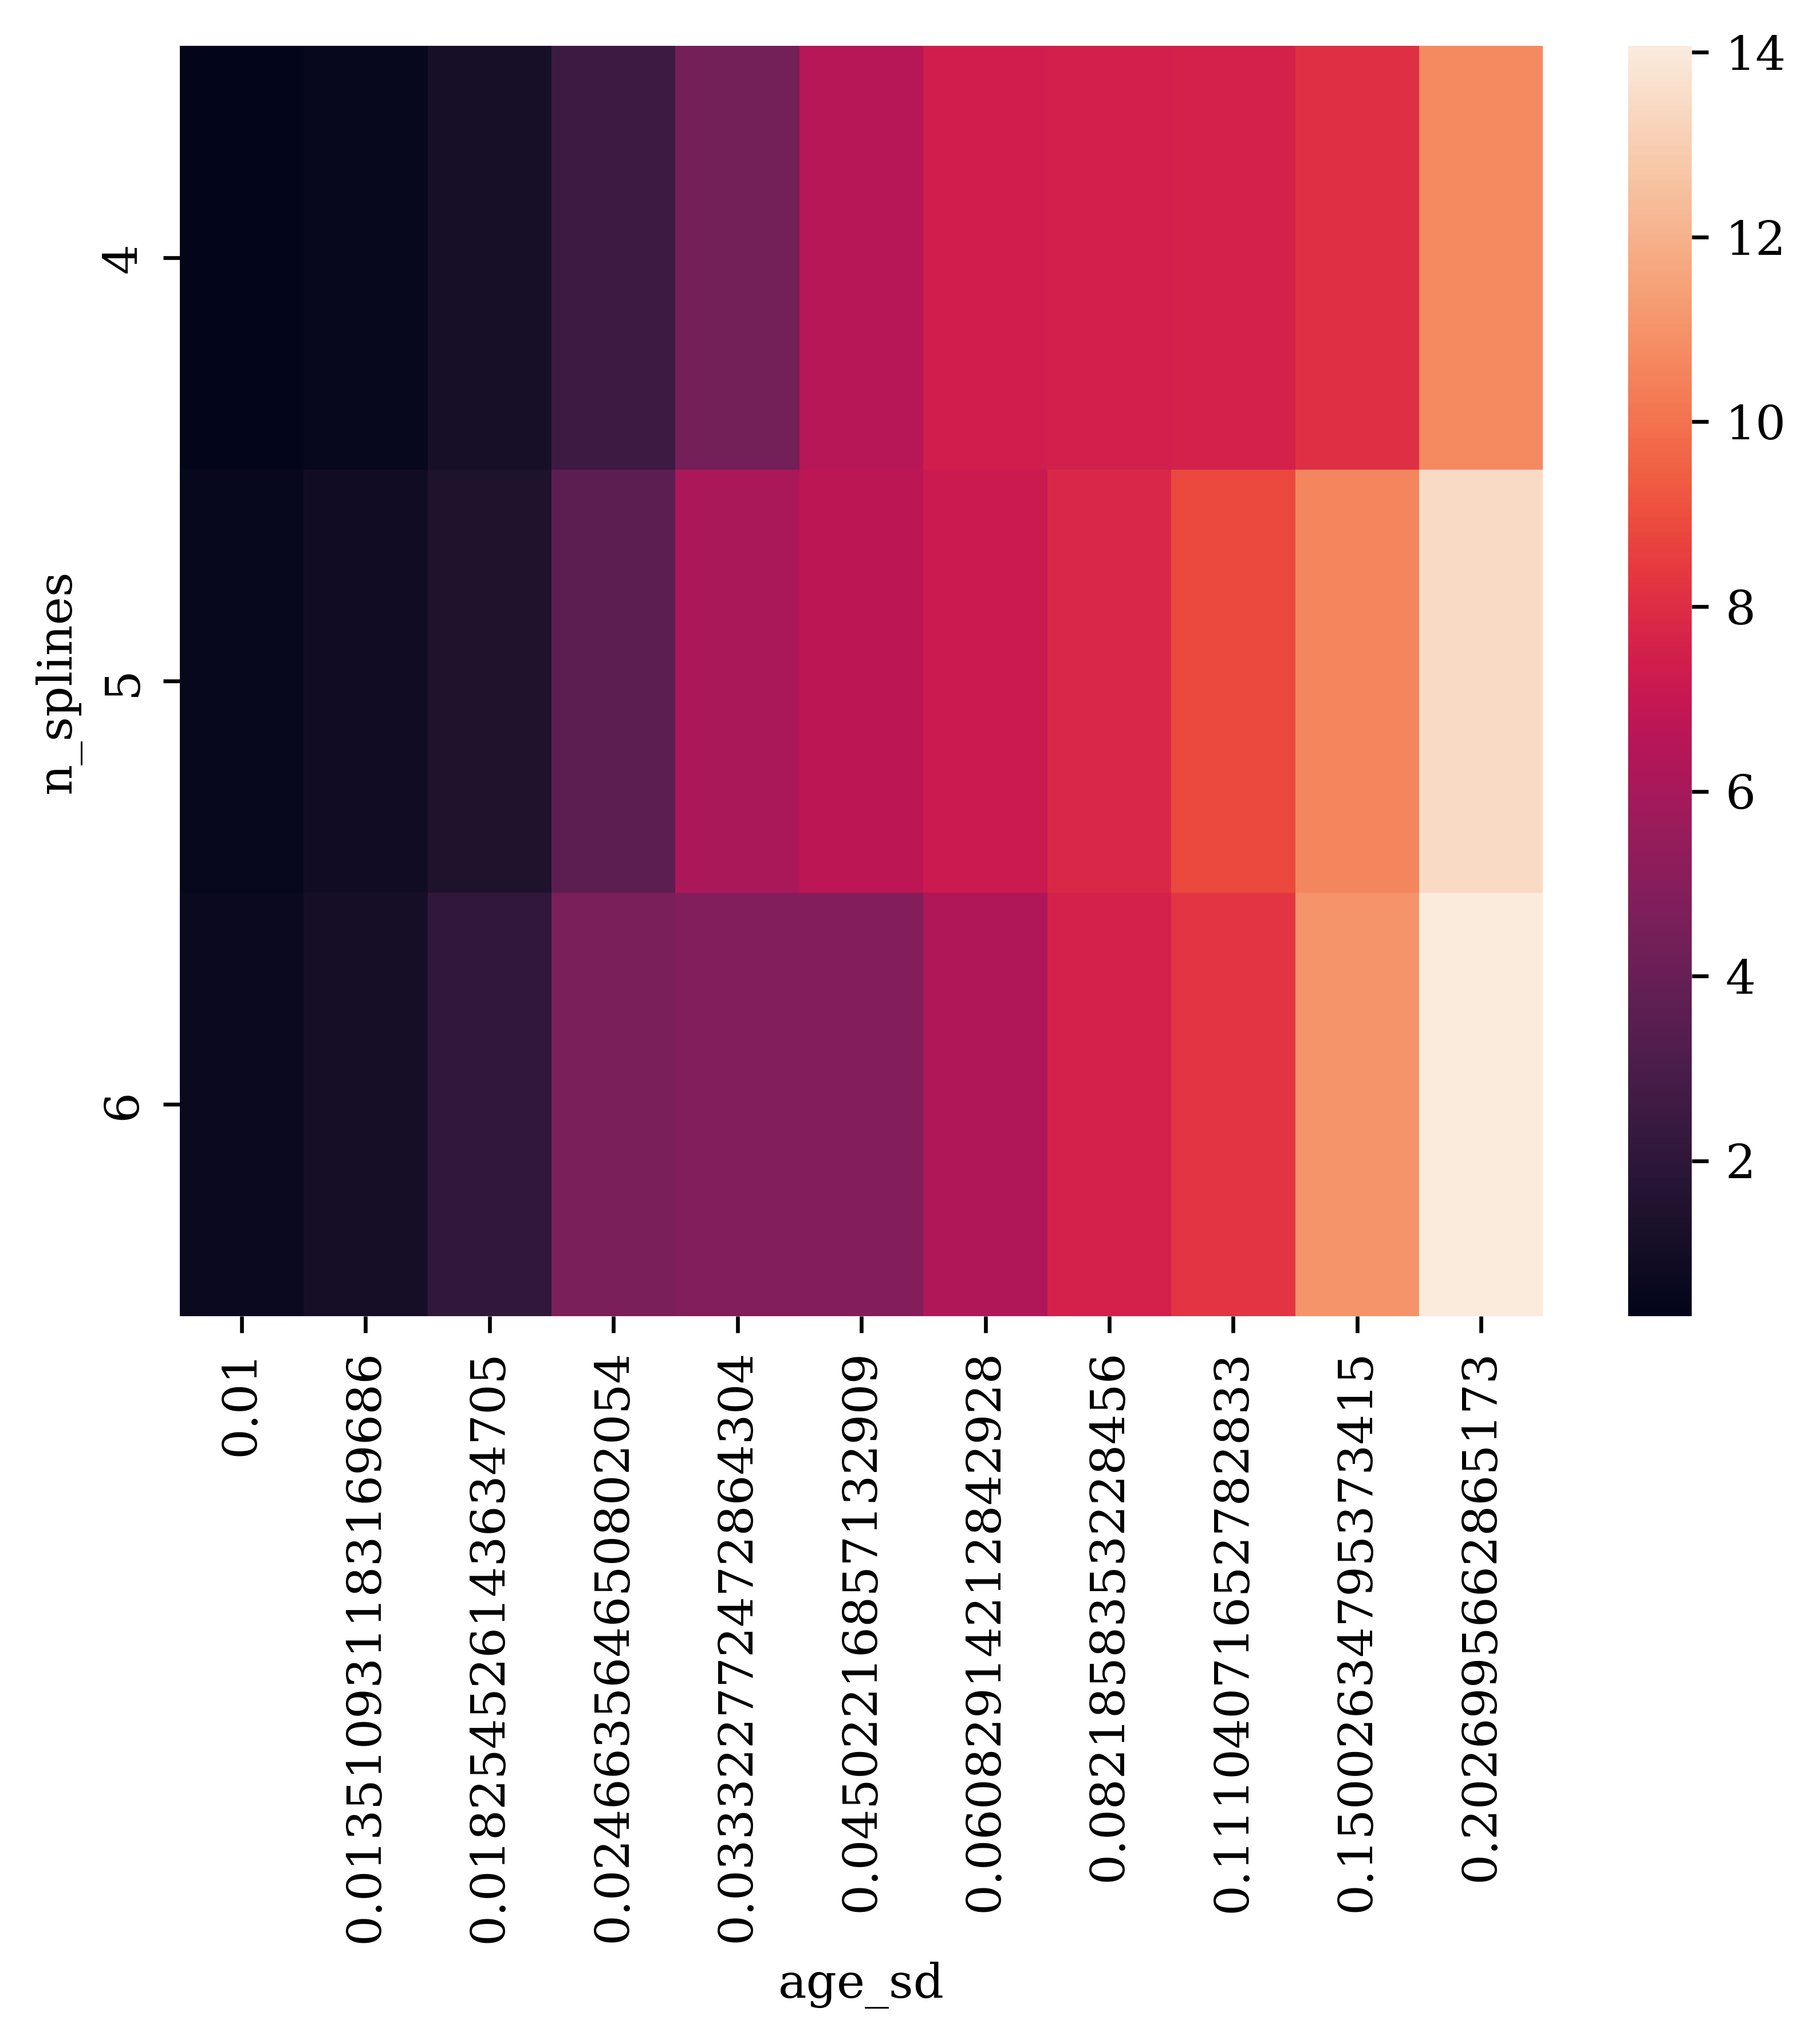

In [6]:
sns.heatmap(tmp_out_df.pivot_table(columns='age_sd', index='n_splines', values='mae'))

[None]

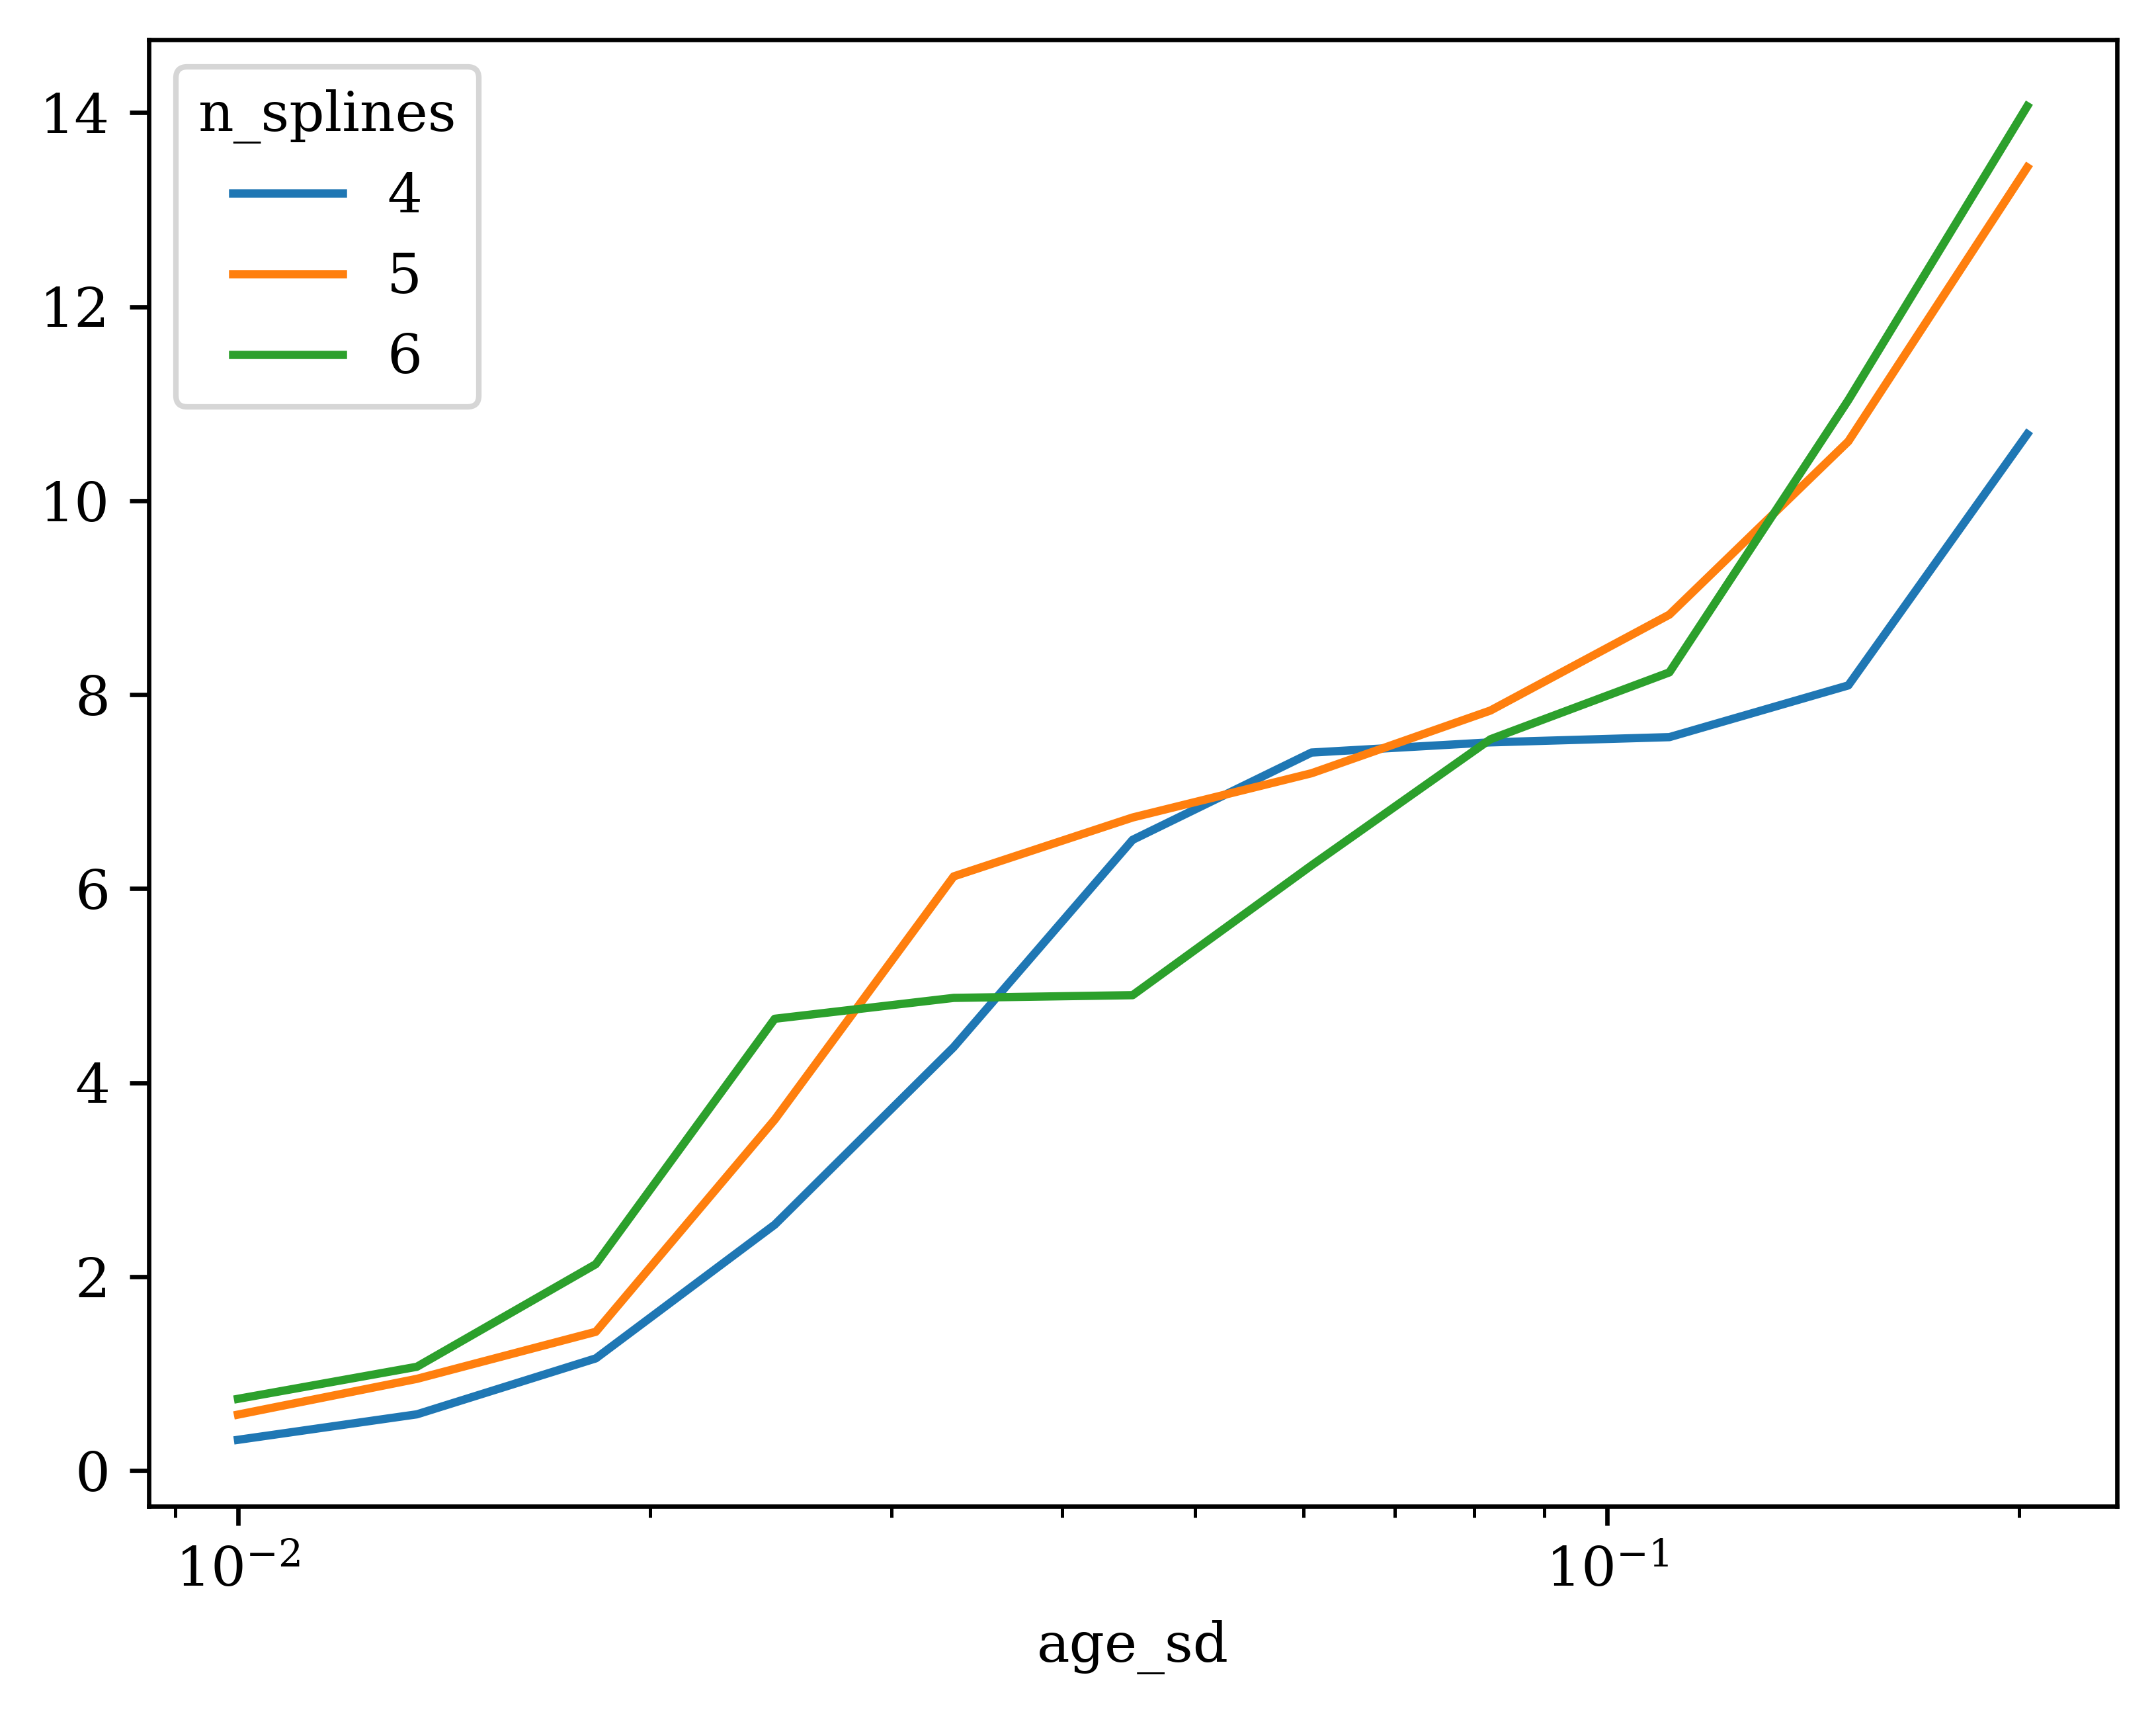

In [7]:
ax = tmp_out_df.pivot_table(index='age_sd', columns='n_splines', values='mae').plot()
ax.set(xscale='log')